<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/mixup_Beyond_Empirical_Risk_Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **mixup: Beyond Empirical Risk Minimization**

논문의 저자는 train data에 dependent한 문제점을 지적한다. 즉, 다른 데이터에서의 general에 대해 언급한 것이다. 따라서 논문의 저자는 한정적인 Dataset에서 어떻게해야 더욱 general하게 model을 만들 수 있는지에 대해 연구를 했다.

기존의 deep learning은 vision 분야나 speech recognition 분야 등에서 획기적인 발전을 이루었다. 이렇게 성공저인 결과에서 신경망들은 최소 2가지의 공통점을 가지고 있는데, 첫번째는 일명 **ERM(Empirical Risk Minimization)**원리라고 불리는 train dataset에 대해 평균 오류를 최소화하는 것이다. 둘째, 이런 최첨단 신경망의 크기는 train의 수에 따라 선형적으로 확장되는 것이다.

## **Empirical distribution**

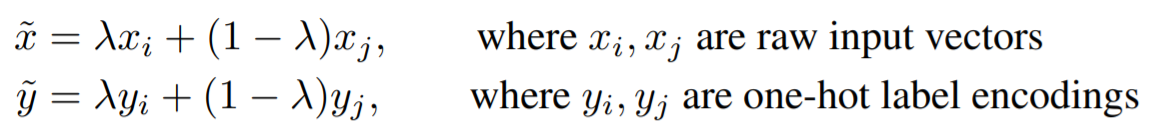

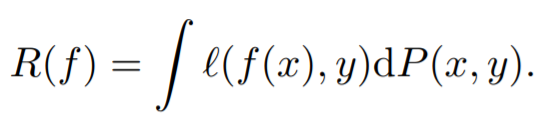

따라서 모델의 학습을 위해 위의 식과 같은 expected risk를 최소화해야 한다. 그러나 대부분의 경우 joint distribution을 모른다.

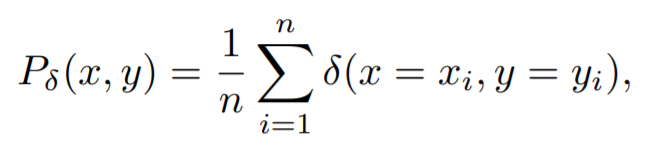

따라서 일반적인 학습의 경우 위와 같이 학습할 dataset을 사용하여 위의 식과 같이 **empirical distribution**을 사용한다.

즉, 첫번째 식을 통해 model을 학습시켜야하는데 dP(x,y)를 모르는 경우가 대부분이기 때문에 train data를 사용하여 위의 식과 같이 joint distribution을 empirical distribution으로 대체하여 사용하는 것이다.

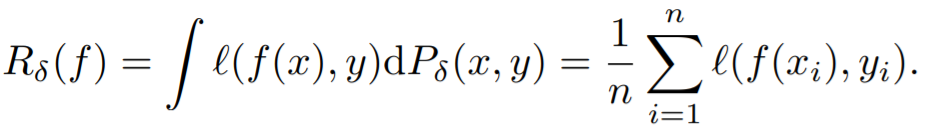

결과적으로 위의 식과 같이 되는데, 이를 **ERM(Empirical Risk Minimization)**이라 한다.

## **Vicinity distribution**

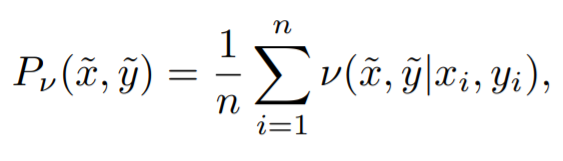

위의 식과 같이 위에서 설명한 joint distribution을 vicinity distribution으로 대체할 수 있다.

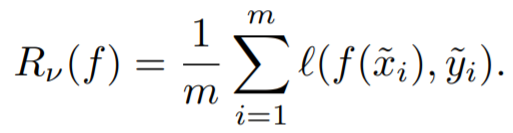

간단하게 train data에 가상의 어떤 data를 섞은 것이라고 생각하면 쉽다. 논문에서는 위의 식과 같이 구성하면, x~가 x(i)의 차를 평균으로 가지고, 분산값을 Sigma^2으로 갖는 정규분포가 vicinity distribution이 된다고 설명한다. 이 효과는 train data에 Gaussian을 더한 것으로 이해하면 된다. 그리고 이를 **VRM(Vicinal Risk Minimization)**이라 한다.

## **MixUp**

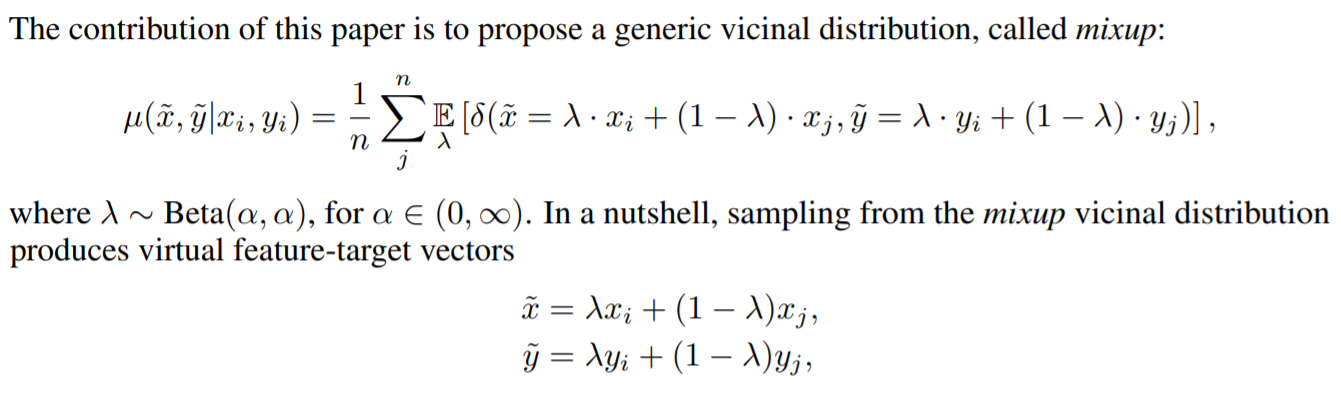

본격적으로 MixUp을 보면 위와 같이 정리할 수 있다. 위에서 살펴본 VRM과 수식이 매우 유사한데, 그 이유는 VRM에서 가상의 어떤 data를 섞는 다고 했던 부분을 dataset에서 가져와서 쓰겠다는 것이기 때문이다.

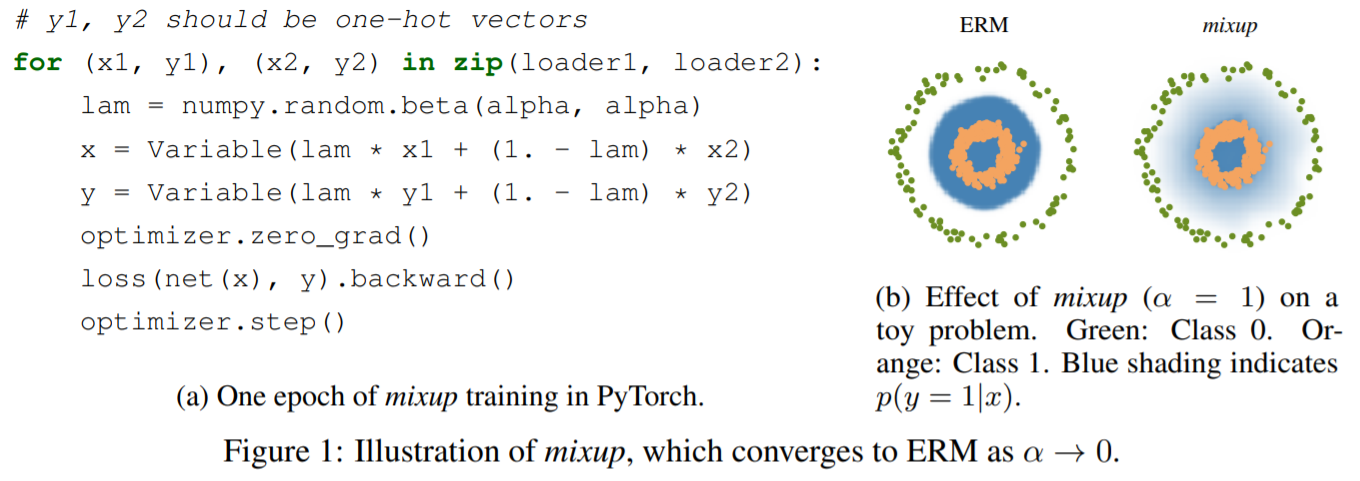

위의 그림 Figure 1은 실제 train에 사용된 코드이다. lambda 값은 beta에서 뽑게 되는데, 분포가 [0,1]사이에서 뽑아지므로, interpolation의 비율(= 가상의 data를 train data에 섞는 비율)을 랜덤하면서도 적절하게 가져갈 수 있다. 그리고 alpha의 값은 1로 고정한다.

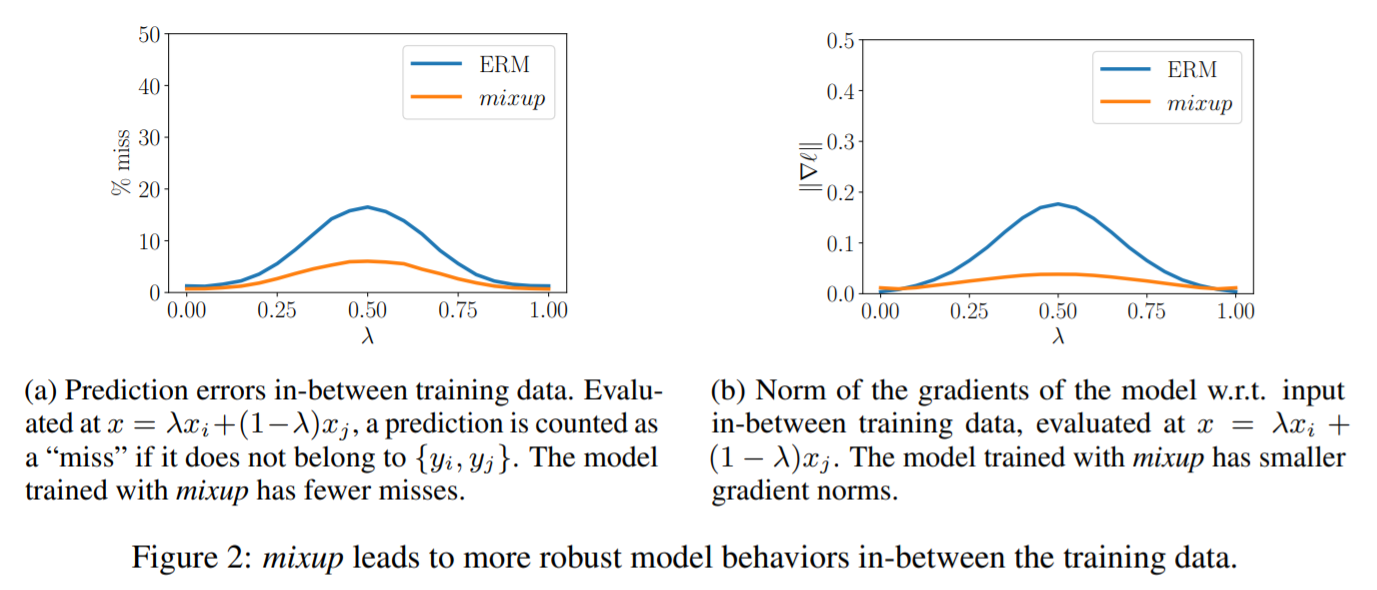

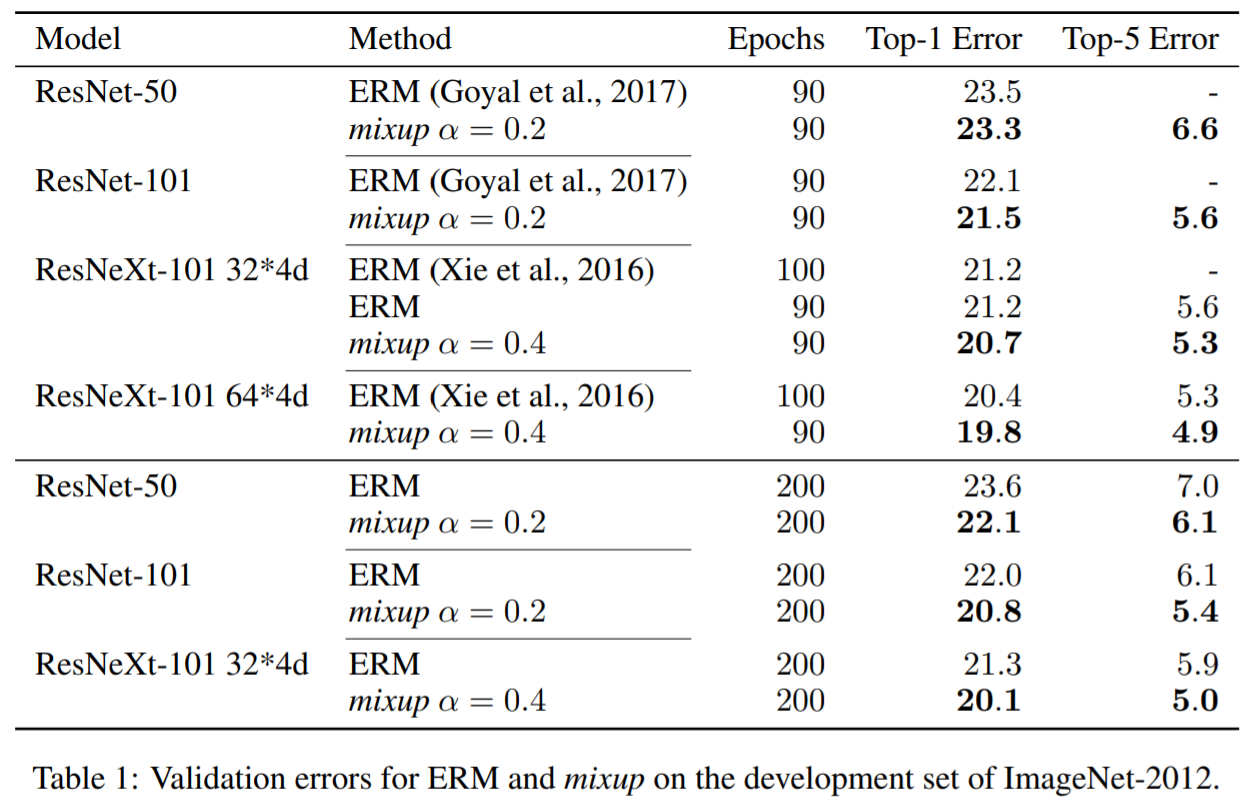

위의 그림 Figure 2는 ERM과 혼합을 사용하여 CIFAR-10 dataset에서 training된 두 신경망 모델의 평균 동작을 보여준다. 두 모델은 모두 동일한 아키텍처를 가지며 동일한 절차로 훈련되며 무작위로 sampling된 train data 사이의 동일한 지점에서 평가된다. 혼합으로 훈련된 모델이 더욱 그레이디언트 규범 측면에서 안정적이다. 또한 위의 테이블 Table 1을 보면 모델의 정확도도 당연히 더 개선된 것을 알 수 있다.

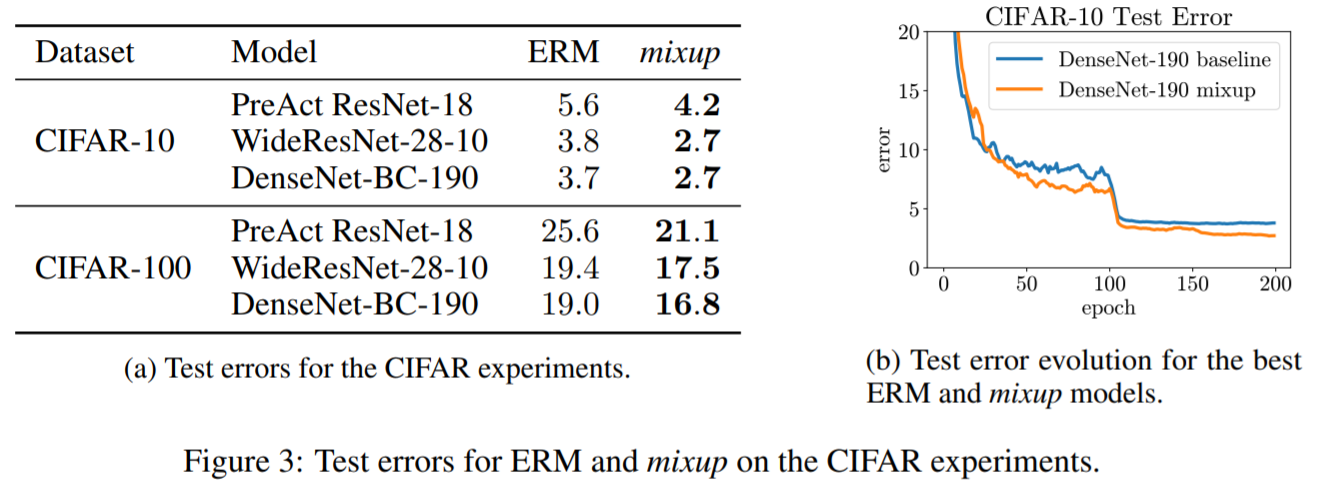

위의 그림 Figure 3을 보면 알 수 있듯이 CIFAR-10 & 100에서 기존의 성능보다 1.1~4.5% 가량 성능이 더 높게 나왔는데, 이는 앞서 설명했듯이 모델이 더욱 general해졌다는 것이다.

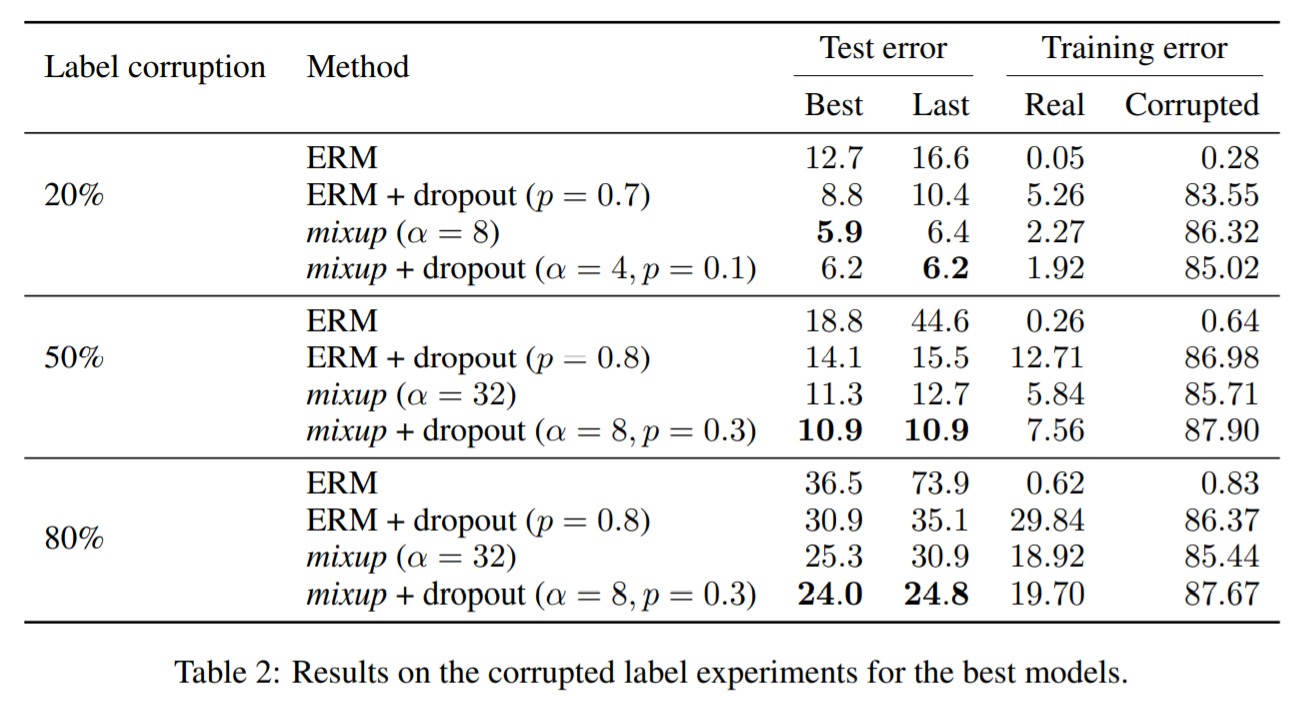

위의 표 Table 2에서는 손상된 label에 대한 정확도를 보여주는데, 기존의 방법들보다 더욱 많은 ACC 값을 갖는 것을 확인할 수 있다. 이 실험에 의해 dropout과 mixup의 긍정적인 결과를 확인할 수 있다.

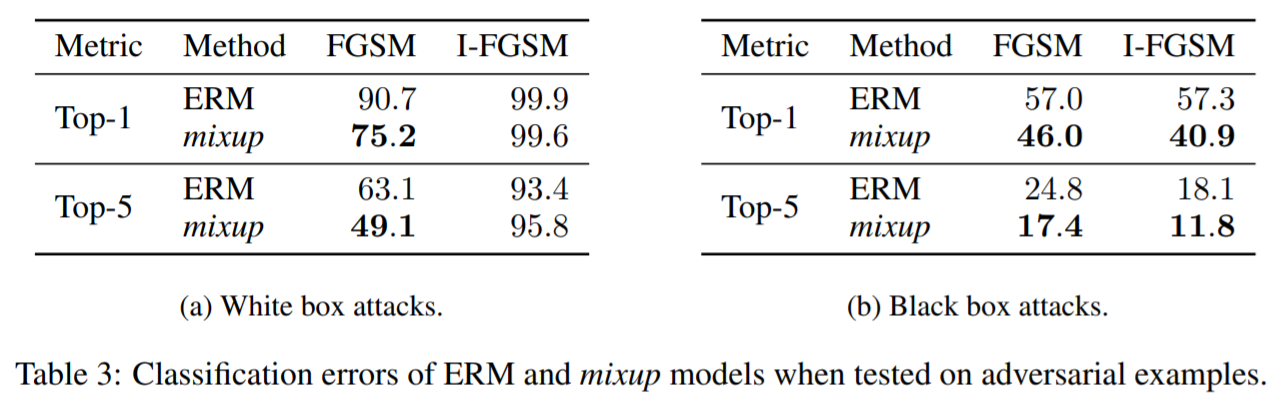

위의 표 Table 3에서는 FGSM, I-FGSM이라는 것이 나온다. 이것은 둘다 **Attack mechanism**인데, 즉 사람 눈에서는 사물이라고 인식할 수 있지만 computer 입장에서는 그렇지 못하게 만드는 오류를 범하게 만드는 noise를 첨가하는 attack이다. 결과적으로 Table 3의 결과로 인해 mixup이 더욱 높은 방어력을 가지고 있다는 것을 알 수 있다.

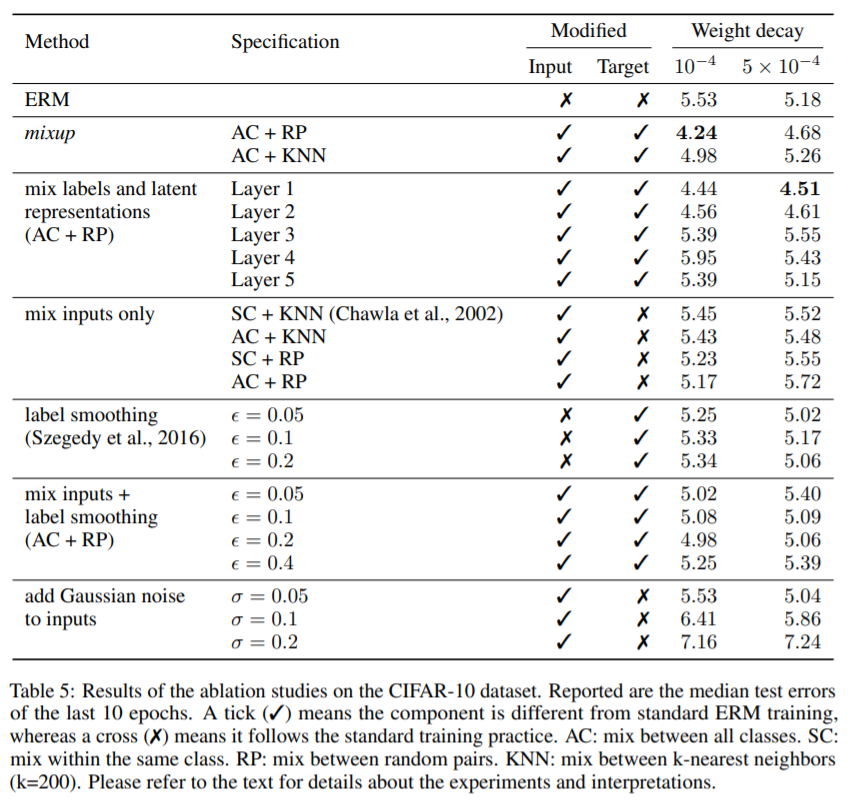

위의 표 Table 5를 통해 mixup에서 **weight decay 값은 10^-4이 좋다**는 것을 알 수 있다.

### **Python**

마지막으로 아래 코드는 python으로 구현한 mixup 코드이다.

In [2]:
import numpy as np

def mixup_data(x, y, alpha=1.0, use_cuda=True):

    '''Compute the mixup data. Return mixed inputs, pairs of targets, and lambda'''
    if alpha > 0.:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.
    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index,:]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(y_a, y_b, lam):
    return lambda criterion, pred: lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)